Q1: Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. Draw the inferences from

In [1]:
import pandas as pd

In [3]:
airlines = pd.read_excel('C:/Users/Lenovo/OneDrive/Desktop/assignments/EastWestAirlines.xlsx',sheet_name='data')
airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
airlines2 = airlines.drop(['ID#'],axis=1)
airlines2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


HIERARCHIAL CLUSTERING

In [6]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [7]:
airlines2_norm=norm_func(airlines)
airlines2_norm

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.000000,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.000249,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.000498,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.000746,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.000995,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.999005,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.999254,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.999502,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.999751,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


In [8]:
#creating dendogram
import matplotlib.pyplot as plt
import numpy as np
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
plt.figure(figsize=(10,7))

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

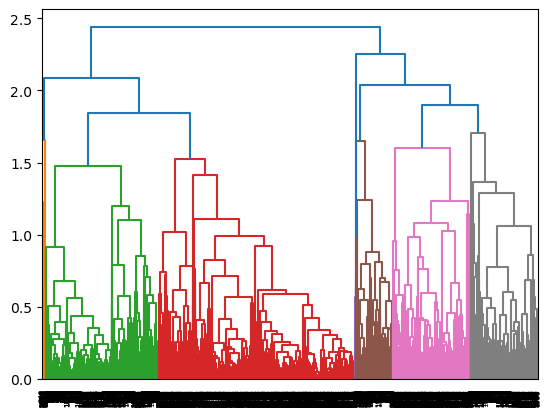

In [9]:
dendrograms  = sch.dendrogram(sch.linkage(airlines2_norm,'complete'))

In [10]:
hclusters = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage = 'ward')
hclusters

AgglomerativeClustering(n_clusters=5)

In [11]:
y = pd.DataFrame(hclusters.fit_predict(airlines2_norm),columns=['CLUSTERSID'])
y['CLUSTERSID'].value_counts()

0    912
4    884
2    838
1    796
3    569
Name: CLUSTERSID, dtype: int64

In [12]:
airlines['CLUSTERSID']=hclusters.labels_
airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,CLUSTERSID
0,1,28143,0,1,1,1,174,1,0,0,7000,0,4
1,2,19244,0,1,1,1,215,2,0,0,6968,0,4
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,4
3,4,14776,0,1,1,1,500,1,0,0,6952,0,4
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,3
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,3
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2


In [13]:
airlines.groupby('CLUSTERSID').agg(['mean']).reset_index()

,CLUSTERSID,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1647.451754,103377.721491,221.676535,3.691886,1.001096,1.023026,41796.067982,19.587719,674.711623,2.025219,4796.646930,1.0
1,1,1879.143216,106682.484925,72.143216,3.227387,1.001256,1.026382,26773.806533,16.486181,196.809045,0.551508,4363.711055,0.0
2,2,3328.994033,31061.826969,108.257757,1.000000,1.000000,1.000000,2479.093079,5.661098,277.115752,0.769690,1784.566826,0.0
3,3,1902.894552,86915.794376,269.880492,1.010545,1.038664,1.010545,8244.121265,9.683656,1150.478032,3.520211,4350.043937,1.0
4,4,1342.245475,44849.627828,81.942308,1.003394,1.038462,1.001131,2674.084842,5.831448,204.661765,0.632353,5261.788462,0.0


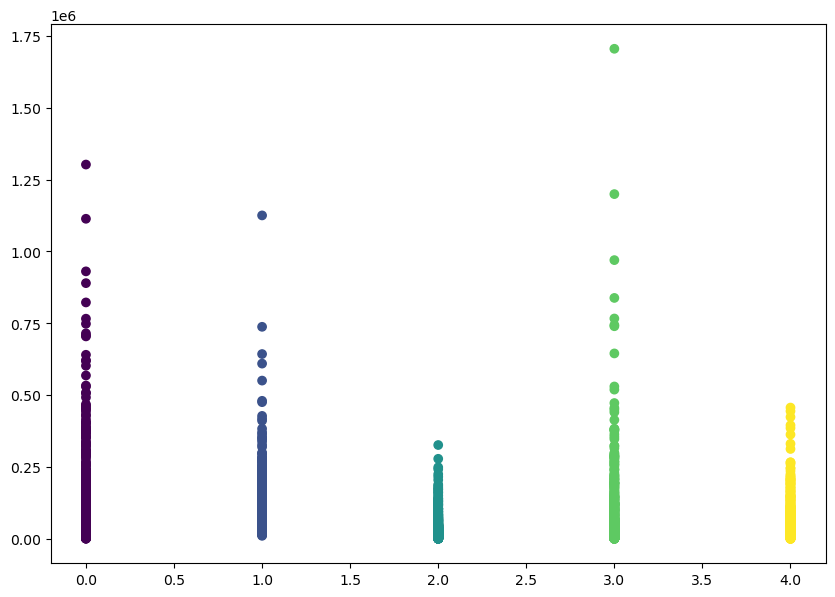

In [14]:
# plot clusters
plt.figure(figsize=(10,7))
plt.scatter(airlines['CLUSTERSID'],airlines['Balance'],c=hclusters.labels_)

K MEANS

In [15]:
#THE K-MEANS ALGORITHM AIMS TO CHOOSE THE CENTROIDS THAT MINIMISE THE INERTIA OR WITHIN-CLUSTER SUM OF SQUARESCRITERION:
from sklearn.cluster import KMeans

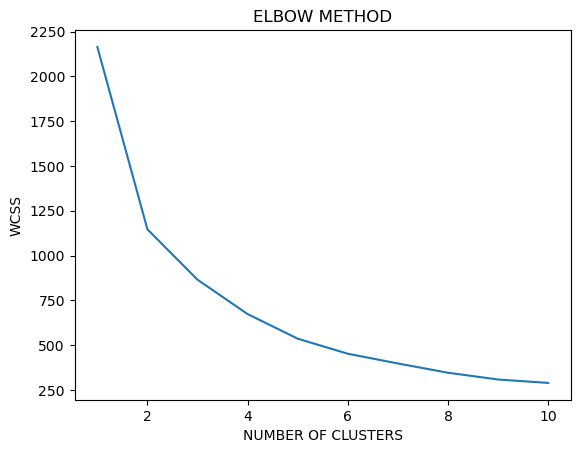

In [16]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,random_state = 0)
    kmeans.fit(airlines2_norm)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('ELBOW METHOD')
plt.xlabel('NUMBER OF CLUSTERS')
plt.ylabel('WCSS')
plt.show()

In [17]:
#BUILDING CLUSER ALGORITHM
clusters_new = KMeans(4,random_state = 42)
clusters_new.fit(airlines2_norm)

KMeans(n_clusters=4, random_state=42)

In [18]:
clusters_new.labels_

array([0, 0, 0, ..., 2, 3, 3])

In [19]:
#assigning clusters to the data set
airlines['CLUSTERID_NEW'] = clusters_new.labels_

In [20]:
#STANDARDIZED VALUES ARE
clusters_new.cluster_centers_

array([[2.85949925e-01, 4.57633072e-02, 6.82633656e-03, 2.47764228e-01,
        6.09756098e-03, 2.84552846e-03, 5.10956085e-02, 1.20892418e-01,
        7.40218088e-03, 1.28700721e-02, 6.76382280e-01, 4.66293670e-15],
       [3.42945649e-01, 6.97214035e-02, 1.80181623e-02, 7.68505080e-01,
        7.25689405e-04, 7.61973875e-03, 1.88969989e-01, 2.42582779e-01,
        2.53419773e-02, 4.46093600e-02, 6.33971854e-01, 1.00000000e+00],
       [5.13172144e-01, 4.57984220e-02, 2.46153226e-02, 1.08270202e-01,
        1.38888889e-02, 1.89393939e-03, 4.05913957e-02, 1.32135307e-01,
        2.99861958e-02, 5.29111873e-02, 4.90783315e-01, 1.00000000e+00],
       [7.83275779e-01, 2.48802073e-02, 8.84346578e-03, 1.08113354e-01,
        7.76397516e-03, 1.55279503e-03, 2.70336913e-02, 9.23913043e-02,
        7.28667850e-03, 1.17778038e-02, 2.54165905e-01, 5.21804822e-15]])

In [21]:
airlines.groupby('CLUSTERID_NEW').agg(['mean']).reset_index()
airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,CLUSTERSID,CLUSTERID_NEW
0,1,28143,0,1,1,1,174,1,0,0,7000,0,4,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,4,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,4,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,4,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,3,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,3,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2,3


DBSCAN

In [22]:
#normalizing heterogenious numerical data using scalar fit transfrom to dataset.
from sklearn.preprocessing import StandardScaler
airlines2_norm = StandardScaler().fit_transform(airlines)
airlines2_norm

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -7.66919299e-01,  1.41794282e+00, -1.24964726e+00],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -7.66919299e-01,  1.41794282e+00, -1.24964726e+00],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -7.66919299e-01,  1.41794282e+00, -1.24964726e+00],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
         1.30391816e+00, -1.32102752e+00,  3.78946317e-01],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -7.66919299e-01,  4.84576524e-02,  1.19324310e+00],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -7.66919299e-01,  4.84576524e-02,  1.19324310e+00]])

In [23]:
#DBSCAN CLUSTERING
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1,min_samples = 4)
dbscan.fit(airlines2_norm)

DBSCAN(eps=1, min_samples=4)

In [24]:
#noisy samples are given in label -1
dbscan.labels_

array([ 0,  0,  0, ...,  1, 10, 10], dtype=int64)

In [26]:
airlines['CLUSTERS'] = dbscan.labels_
airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,CLUSTERSID,CLUSTERID_NEW,CLUSTERS
0,1,28143,0,1,1,1,174,1,0,0,7000,0,4,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,4,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,4,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,4,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,3,2,3
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,3,2,3
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,2,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2,3,10
